## 라이브러리 import

In [1]:
import os
import face_recognition
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from module import get_distance, get_face_embedding, get_face_embedding_dict, get_gropped_face, get_nearest_face, get_sort_key_func

%matplotlib inline

## 사진에서 얼굴 추출

#### 내 사진에서 얼굴을 추출 후 저장

In [2]:
image_path = 'images/image1.jpg'
face = get_gropped_face(image_path)
pil_img = Image.fromarray(face)
pil_img.save('img1_cut.jpg')

In [3]:
image_path = 'images/image2.jpg'
face = get_gropped_face(image_path)
pil_img = Image.fromarray(face)
pil_img.save('img2_cut.jpg')

#### 모은 연예인 사진들에서 얼굴 추출

In [4]:
# 연예인 사진 얼굴 영역 추출
image_paths = glob('./origin/*')
target_path = 'img/'

for path in image_paths:
    fname = path.split('/')[-1].split('.')[0] + '.jpg'
    face = get_gropped_face(path)
    pil_img = Image.fromarray(face)
    pil_img.save(os.path.join(target_path, fname))

## 임베딩 추출

#### 먼저 내 사진의 임베딩을 추출한다
- ```my_embedding```에 저장

In [5]:
face = get_gropped_face('img2_cut.jpg')
my_embedding = get_face_embedding(face)
my_embedding

[array([-0.06133892,  0.14689493,  0.05461725, -0.05113985, -0.06465995,
        -0.02718332, -0.10893595, -0.0934553 ,  0.18913615, -0.11025559,
         0.21366929, -0.02914148, -0.21546267, -0.01706228, -0.07477009,
         0.19861656, -0.16493282, -0.13086239, -0.07550208, -0.00892556,
         0.09731393,  0.07361428, -0.0114171 ,  0.05797008, -0.03113271,
        -0.27736861, -0.10210969, -0.06667712, -0.03071629, -0.06848208,
        -0.06493933,  0.06271266, -0.15801401, -0.08286765,  0.04833027,
         0.05329385, -0.00200816, -0.02825999,  0.25308615, -0.00078377,
        -0.20477808,  0.07859888,  0.076772  ,  0.26694518,  0.22635536,
         0.04024813, -0.00627936, -0.16393779,  0.11580191, -0.14735787,
         0.08156014,  0.17811537,  0.12892886,  0.11913773,  0.00315479,
        -0.15188605,  0.03743957,  0.0641387 , -0.10338013, -0.0010352 ,
         0.15793246, -0.13953874, -0.00354879, -0.05895383,  0.2511526 ,
         0.0077188 , -0.10979429, -0.21219049,  0.1

#### 연예인들의 사진이 있는 경로로부터 임베딩 생성
- 연예인들의 사진들이 있는 경로(```'img/'```)를 인자로 주어서 ```embedding_dict```생성
- 앞에서 생성한 내 얼굴의 임베딩을 ```embedding_dict```에 추가

In [6]:
embedding_dict = get_face_embedding_dict('img/')
embedding_dict['jh'] = my_embedding[0]
# 많은 연예인들의 임베딩 맨 끝에 전에 만든 내 얼굴의 임베딩도 추가해준다.
# embedding_dict

#### 현재 embedding_dict에 있는 key값 확인

In [15]:
len(embedding_dict.keys()), embedding_dict.keys()

(196,
 dict_keys(['기성용', '이동휘', '브래들리 쿠퍼', '조원희', '김상호', '황병국', '제프리 힌턴', '저스틴 존슨', '사무엘 L 잭슨', '이대형', '티모시 달튼', '박항서', '스윙스', '톰 홀랜드', '유재석', '개리', '이준혁', '박휘순', '잭 니콜슨', '이승기', '슈가', '박신양', '정민철', '주호민', '이안 굿펠로우', '정우성', '개코', '조정석', '이희준', '레오나르도 디카프리오', '박희순', '마크 러팔로', '존 파브르', '유해진', '잭 스페이더', '리암 니슨', '최양락', '김윤석', '슬리피', '하현우', '이종석', 'bush', '홍구', '케빈 스페이시', '이용진', '김민재', '심수창', '하승진', '윤균상', '이성민', '다니엘 크레이그', '철면수심', '박찬욱', '오재원', '최민식', '이제훈', '클린트 이스트우드', '이말년', '한석규', '이민호', '윤도현', '고창석', '최무성', '박명수', '배성우', '숀 코네리', '이천수', '최현석', 'trump', '김대명', '차두리', '김경진', '진', 'clinton', '유희열', '박정민', '이연걸', '정형돈', '박용택', 'biden', '박서준', '택연', '손흥민', '류현진', '장성호', '이영하', '조정치', '잭 블랙', '씨잼', '로다주', '류준열', '주진모(올드)', '하하', '이재용', '지드래곤', '차승원', '방시혁', '안재홍', '박보검', '제이크 질렌할', '박건우', '제이콥 배털론', '대도서관', '박완규', '김학범', '황정민', '윤경신', '드웨인 존슨', '이근대위', '장원준', '김래원', '김희철', '신동엽', '줄리엔강', '박재범', '김연우', '이승철', '한기범', '최준석', '조달환', '지민(BTS)', '이범수', '서강준', '강동원', '김C', '정수빈', '벤 에플렉', '김대중',

## 나와 비슷한 연예인 얼굴 확인
- 상위 5명의 닮은 꼴을 출력

In [8]:
top = get_nearest_face('jh', embedding_dict=embedding_dict, top=5)

순위 1 : 이름(박정민), 거리(0.4681527443395975)
순위 2 : 이름(씨잼), 거리(0.47364683750201897)
순위 3 : 이름(박성호), 거리(0.47945704662493005)
순위 4 : 이름(대도서관), 거리(0.4811011164976763)
순위 5 : 이름(김연우), 거리(0.48406112487917313)


## 시각화로 해보자 

### matplotlib

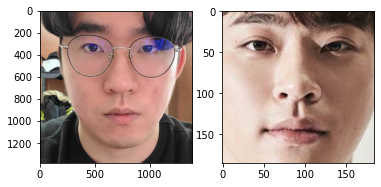

In [9]:
target_path='./img/'
top_fname = os.path.join(target_path + top) + '.jpg'
plt.subplot(1,2,1)
plt.imshow(Image.open('img2_cut.jpg'))
plt.subplot(1,2,2)
plt.imshow(Image.open(top_fname))
plt.show()

### tkineter
- 이전에 노드에서 배운 tkinter를 활용해서 gui로 만들어 보았다.

In [ ]:
from tkinter import *
from tkinter import filedialog, font
import tkinter.ttk as ttk
from PIL import Image, ImageTk
import matplotlib.pyplot as plt

import face_recognition
from glob import glob
from PIL import Image
from e12 import get_distance, get_face_embedding, get_face_embedding_dict, get_gropped_face, get_nearest_face, get_sort_key_func

%matplotlib inline

# font = font.Font(family="맑은 고딕", size=5, slant="italic")

window = Tk()
window.title("닮은 꼴 찾기")
window.geometry("1000x512")

# 라벨 생성

label1 = ttk.Label(window, text="입력사진") #, font=font)
label1.grid(column=0, row=1, pady=10)
label2 = ttk.Label(window, text="닮은 연예인") #, font=font)
label2.grid(column=2, row=1, pady=10)


# 텍스트 박스 생성
canv1 = Canvas(window, width=400, height=400, bg="white")
canv2 = Canvas(window, width=400, height=400, bg="white")
canv1.grid(row=2, column=0, padx=20, pady=10)   
canv2.grid(row=2, column=2, padx=20, pady=10)
text1 = Text(window, width=40, height=3)# , font=font)
text1.grid(row=4, column=0, padx=20, pady=10)
text2 = Text(window, width=40, height=3)# , font=font)
text2.grid(row=4, column=2, padx=20, pady=10)

# 버튼클릭 콜백 함수    
def click():
    # 입력사진의 경로를 text1로부터 불러온다
    fname = text1.get('1.0', 'end-1c')
    text1.delete(1.0, 'end')
    text1.insert('end', '찾긴했는데....말이죠')
    # 파일경로를 전달해서 얼굴은 인식 후 입력사진에 대한 임베딩 벡터생성
    face = get_gropped_face(fname)
    pil_img = Image.fromarray(face)
    my_embedding = get_face_embedding(face)
    # 경로에 저장되어 있는 연예인 얼굴사진들을 통해서 임베딩 벡터 딕셔너리 생성
    embedding_dict = get_face_embedding_dict('img/')
    embedding_dict['input'] = my_embedding[0]
    
    # 제일 상위 랭크의 인물을 top에 저장
    top = get_nearest_face('input', embedding_dict, top=5)
    top_img = Image.open('img/'+top+'.jpg')
    text2.delete(1.0, 'end')
    text2.insert('end', top+'..?')
    # 이미지를 canv2에 뿌려준다.
    img2 = ImageTk.PhotoImage(top_img.resize((400, 400)))
    canv2.create_image(0, 0, anchor=NW, image=img2)
    canv2.image = img2
    
def load_image():
    # 파일을 선택한다
    filename = filedialog.askopenfilename(title='select img', filetypes=(('jpeg files', '*.jpg *.jpeg'), ('all files', '*.*')))
    pil_img = Image.open(filename)
    # canv1에 입력받은 사진을 띄워준다.
    img1 = ImageTk.PhotoImage(pil_img.resize((400, 400)))
    canv1.create_image(0, 0, anchor=NW, image=img1)
    canv1.image = img1
    # 닮은꼴을 찾을때 전달해주기 위해서 입력 파일명을 잠시 저장해준다.
    text1_string = filename
    text1.insert('end', text1_string)

# 입력과 출력을 초기화한다.
def reset():
    text1.delete(1.0, 'end')
    canv1.delete("all")
    text2.delete(1.0, 'end')
    canv2.delete("all")
    
# 버튼 생성 
action = ttk.Button(window, text="찾기", command=click)   
action.grid(row=2, column=1)
img_load = ttk.Button(window, text="이미지 불러오기", command=load_image)
img_load.grid(row=1, column=1)
reset_input = ttk.Button(window, text="처음부터", command=reset)
reset_input.grid(row=4, column=1)

window.mainloop()

## 정리

1. 얼굴 임베딩 벡터를 활용, 상위 5명의 연예인 사진들을 출력해보았다.
    - 박정민, 씨잼, 박성호, 대도서관, 김연우 순서로 출력
2. 총 196명의 유명인 이미지로 부터 임베딩 거리 0.5이하의 닮은 꼴들을 많이 찾을 수 있었다.
    - 박정민 : ```0.468```
    - 죄송합니다
3. 시각화 시도
    - ```matplotlib```을 통해서 내 사진과 가장 닮은 연예인의 사진을 함께 출력해주었다.(죄송합니다)
    - 추가적으로 ```tkinter```를 활용해서 GUI환경도 구현해 보았다.
        - 입력 사진 선택
            ![image](https://user-images.githubusercontent.com/48716219/92770348-d4fa2100-f3d4-11ea-9c98-913b367fded6.png)
        - 출력화면
            ![Screenshot from 2020-09-11 02-15-13](https://user-images.githubusercontent.com/48716219/92770435-e8a58780-f3d4-11ea-931e-7db8e8167291.png)


       